## Cats vs Dogs Classification using DL

#### Imports:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import cv2
import shutil
from shutil import copyfile
import random

import keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # from keras.preprocessing.image import ImageDataGenerator is deprecated
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Plot history:

In [6]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [7]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')  # Use only the first GPU
        print("GPU is enabled for training.")
    except RuntimeError as e:
        print(e)


In [8]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)


In [9]:
# function to plote training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')
    
    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

#### Setting up the data:

In [10]:
train_dir = 'D:\\vscode\\jupyter notebook\\cat vs dog\\training_set'
test_dir = 'D:\\vscode\\jupyter notebook\\cat vs dog\\test_set'

In [11]:
#use generators
#resize image
train_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 8005 files belonging to 1 classes.
Found 2023 files belonging to 1 classes.


In [12]:
def process(image, label):
    image = tf.cast(image/255,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#### Approach 1: CNN

In [13]:
# Model Definition
INPUT_SHAPE = (256, 256, 3)

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [14]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                   

In [16]:
history = model.fit(train_ds,
                  batch_size = 32,
                  verbose=1,
                  epochs=5,
                  validation_data=validation_ds,
                  shuffle=False)

Epoch 1/5
251/251 [==============================] - 330s 1s/step - loss: 0.0030 - accuracy: 0.9973 - val_loss: 3.0937e-26 - val_accuracy: 1.0000
Epoch 2/5
251/251 [==============================] - 195s 776ms/step - loss: 3.7997e-12 - accuracy: 1.0000 - val_loss: 3.0893e-26 - val_accuracy: 1.0000
Epoch 3/5
251/251 [==============================] - 194s 773ms/step - loss: 4.6763e-17 - accuracy: 1.0000 - val_loss: 3.0892e-26 - val_accuracy: 1.0000
Epoch 4/5
251/251 [==============================] - 237s 942ms/step - loss: 2.8755e-13 - accuracy: 1.0000 - val_loss: 3.0885e-26 - val_accuracy: 1.0000
Epoch 5/5
251/251 [==============================] - 254s 1s/step - loss: 9.9515e-17 - accuracy: 1.0000 - val_loss: 3.0884e-26 - val_accuracy: 1.0000


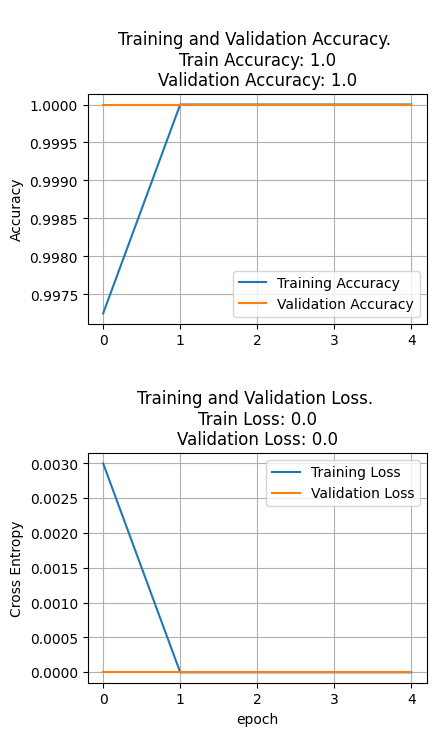

In [17]:
plot_history(history)

In [18]:
_, acc = model.evaluate(validation_ds)
print("Accuracy: ", (acc*100.0), " %")

64/64 [==============================] - 13s 194ms/step - loss: 3.0884e-26 - accuracy: 1.0000
Accuracy:  100.0  %


#### Approach 2: VGG16

In [19]:
# Load the pre-trained VGG19 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False
# Add custom classification layers on top of the pre-trained model
last_output = base_model.output
x = tf.keras.layers.Flatten()(last_output)  # Flatten the output layer to 1 dimension
x = tf.keras.layers.Dense(1024, activation='relu')(x)   # Add a fully connected layer with 1024 hidden units and ReLU activation
x = tf.keras.layers.Dropout(0.6)(x) # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # 2 classes: cat and dog

In [20]:
# Create the final model
vgg16_model = Model(inputs=base_model.input, outputs=predictions)

In [21]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [22]:
vgg16_model.compile(optimizer = tf.keras.optimizers.legacy.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

: 

In [ ]:
# Train the model
history = vgg16_model.fit(train_ds,
                       epochs=2,
                       validation_data=validation_ds,
                       verbose=1)

Epoch 1/2
114/251 [============>.................] - ETA: 16:24 - loss: 0.0131 - accuracy: 0.9915

In [1]:
plot_history(history)

NameError: name 'plot_history' is not defined

#### Approach 3: ResNet50

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model

In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False
# Add custom classification layers on top of the pre-trained model
last_output = base_model.output 
x = tf.keras.layers.Flatten()(last_output)  # Flatten the output layer to 1 dimension
x = tf.keras.layers.Dense(1024, activation='relu')(x)   # Add a fully connected layer with 1024 hidden units and ReLU activation
x = tf.keras.layers.Dropout(0.6)(x) # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # 2 classes: cats and dogs


In [12]:
resnet50_model = Model(inputs=base_model.input, outputs=predictions)
resnet50_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [14]:
resnet50_model.compile(optimizer = tf.keras.optimizers.legacy.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [18]:
# Train the model
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

# Define dataset paths
train_dir = "D:\\vscode\\jupyter notebook\\cat vs dog\\training_set"
test_dir = "D:\\vscode\\jupyter notebook\\cat vs dog\\test_set"

# Check if directories exist
if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    raise FileNotFoundError("Error: One of the dataset directories is missing!")

# Load training dataset
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Load validation dataset
validation_ds = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Normalize the dataset (scale pixel values)
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Normalize pixel values
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.6)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Train the model
resnet50_history = model.fit(
    train_ds,
    epochs=2,
    validation_data=validation_ds,
    verbose=1
)

# ✅ Save the trained model
model.save("resnet50_cats_vs_dogs.h5")

print("Training completed and model saved!")


Found 8005 files belonging to 1 classes.
Found 2023 files belonging to 1 classes.
Epoch 1/2
251/251 [==============================] - 1716s 7s/step - loss: 0.0027 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
251/251 [==============================] - 847s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training completed and model saved!


In [20]:
plot_history(resnet50_history)

NameError: name 'plot_history' is not defined